# Train S2F model and analyze sequence features

Here we will demonstrate how to perform a simple analysis of ATAC data with a sequence to function model using some tools from DRG. 

## Download utilized genome

In [8]:
%%capture 

import os
import subprocess
import sys

# Create the directory if it doesn't exist
os.makedirs(os.path.expanduser("~/data/genomes/danRer11"), exist_ok=True)

# Change to the directory
os.chdir(os.path.expanduser("~/data/genomes/danRer11"))

# Download the genome assembly
if not os.path.isfile('danRer11.fa.gz'): 
    subprocess.run([
        "wget",
        "ftp://hgdownload.soe.ucsc.edu/goldenPath/danRer11/bigZips/danRer11.fa.gz",
        "-O", "danRer11.fa.gz"
    ])

# Download the gene annotation
if not os.path.isfile('GRCz11.104.gtf.gz'):
    subprocess.run([
        "wget",
        "ftp://ftp.ensembl.org/pub/release-104/gtf/danio_rerio/Danio_rerio.GRCz11.104.gtf.gz",
        "-O", "GRCz11.104.gtf.gz"
    ])


# Visualize data and normalize

                  anterior.posterior.axis  central.nervous.system  forebrain  \
chr1:5232-5732                   4.612648                5.204557   3.391132   
chr1:5787-6287                   4.721959                5.358137   3.557652   
chr1:10088-10588                 4.806994                5.338711   3.360469   
chr1:10991-11491                 4.879061                5.578282   4.236443   
chr1:11895-12395                 5.052703                5.736003   4.323331   

                  immature.eye  integument  lateral.plate.mesoderm  \
chr1:5232-5732        4.552681    3.668004                4.766655   
chr1:5787-6287        4.688727    3.546239                4.748463   
chr1:10088-10588      4.163852    3.668004                4.955051   
chr1:10991-11491      4.404106    4.145129                4.893466   
chr1:11895-12395      4.790483    4.440677                5.033977   

                  mesenchyme.cell  musculature.system  neural.crest  \
chr1:5232-5732           4.

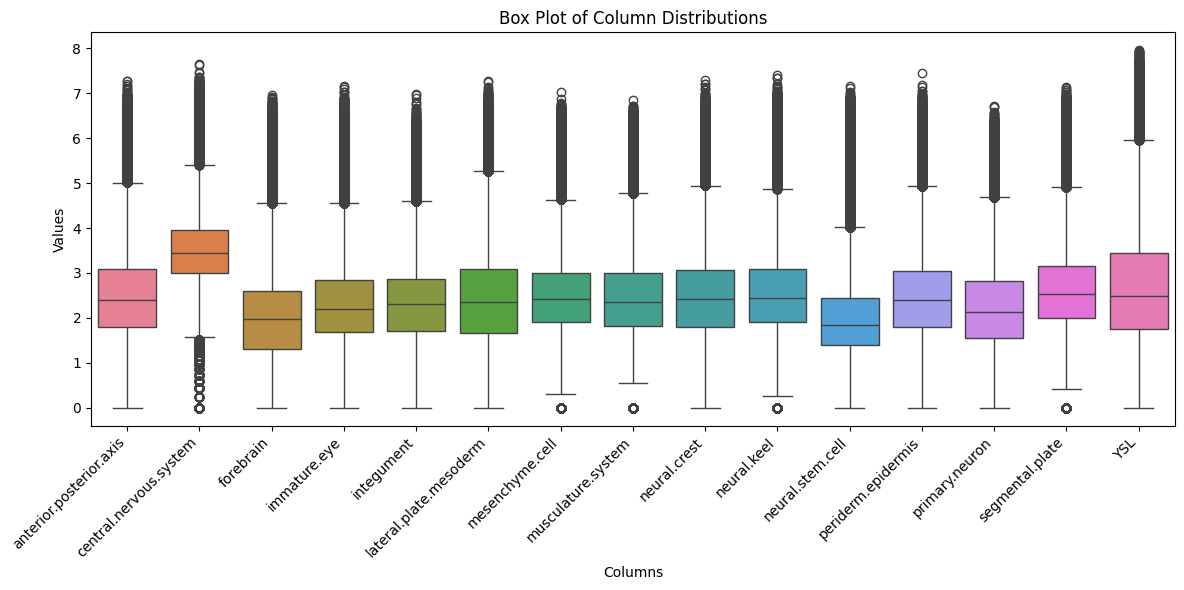

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Define the path to the CSV file
PATH = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.csv')

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(PATH, index_col=0)
print(data.head())
# Plot a box plot for the distributions in each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

# Set the x-tick labels to the column names
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Column Distributions')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()


anterior.posterior.axis    2.395626
central.nervous.system     3.441339
forebrain                  1.984860
immature.eye               2.197871
integument                 2.300787
lateral.plate.mesoderm     2.354598
mesenchyme.cell            2.409666
musculature.system         2.360297
neural.crest               2.415504
neural.keel                2.442039
neural.stem.cell           1.841349
periderm.epidermis         2.405200
primary.neuron             2.141170
segmental.plate            2.531056
YSL                        2.489766
dtype: float64


/home/sasse/miniconda3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sasse/miniconda3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


chr1:5232-5732             0.689872
chr1:5787-6287             0.712622
chr1:10088-10588           0.732119
chr1:10991-11491           0.880135
chr1:11895-12395           0.817345
                             ...   
chr25:37496849-37497349    0.739670
chr25:37498519-37499019    0.783834
chr25:37499249-37499749    0.437743
chr25:37499773-37500273    0.526545
chr25:37501135-37501635    0.402437
Length: 370058, dtype: float64


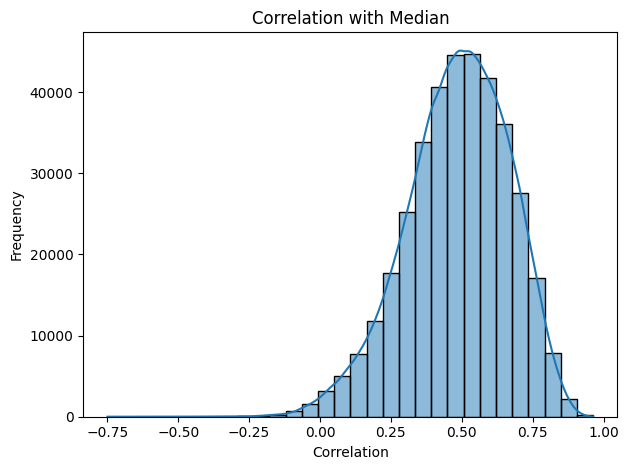

In [ ]:
# plot the correlation of each data point across columns to the median
# Calculate the median
median = data.median(axis=0)
# Calculate the correlation of each data point with the median
correlation = data.corrwith(median, axis=1)
sns.histplot(correlation, bins=30, kde=True)
plt.title('Correlation with Median')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

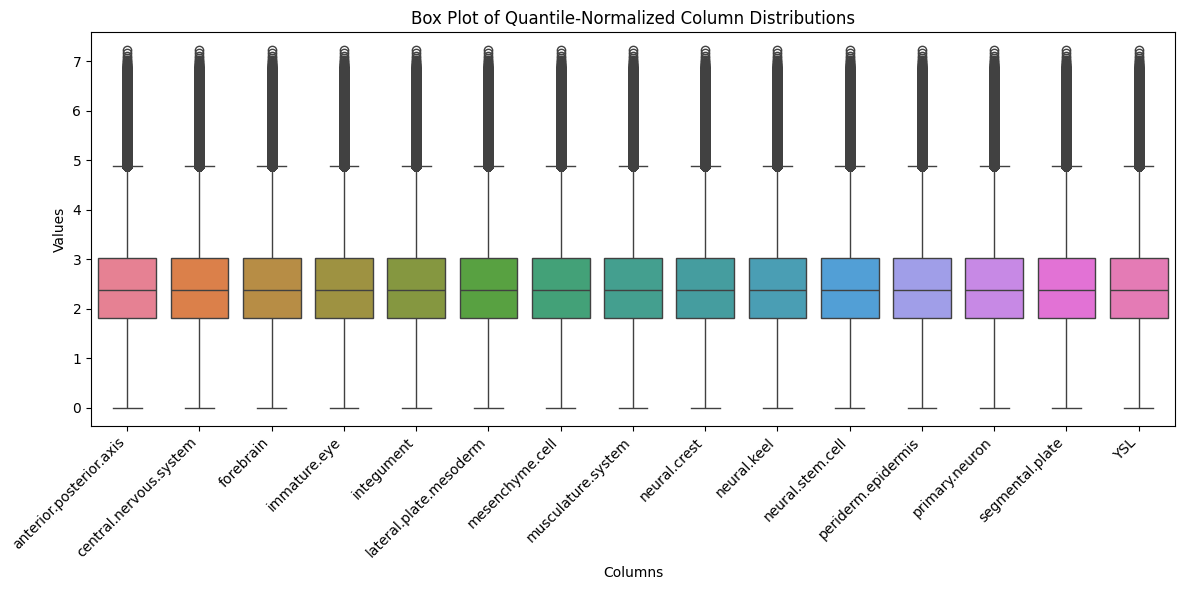

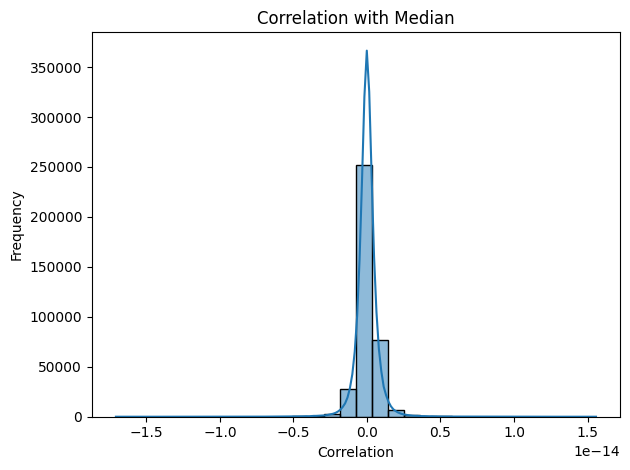

In [12]:
# Perform quantile normalization
def quantile_normalize(df):
    sorted_df = np.sort(df.values, axis=0)
    mean_sorted = np.mean(sorted_df, axis=1)
    ranks = np.argsort(np.argsort(df.values, axis=0), axis=0)
    normalized = mean_sorted[ranks]
    return pd.DataFrame(normalized, columns=df.columns, index=df.index)

normalized_data = quantile_normalize(data)

# Plot a box plot for the quantile-normalized data
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_data)

# Set the x-tick labels to the column names
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Quantile-Normalized Column Distributions')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

# plot the correlation of each data point across columns to the median
# Calculate the median
median = normalized_data.median(axis=0)
# Calculate the correlation of each data point with the median
correlation = normalized_data.corrwith(median, axis=1)
sns.histplot(correlation, bins=30, kde=True)
plt.title('Correlation with Median')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
# Save the quantile-normalized data to a new CSV file
output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.qn.csv')
normalized_data.index.name = '# position'

normalized_data.to_csv(output_path, index=True)
print(f"Quantile-normalized data saved to {output_path}")

Index(['anterior.posterior.axis', 'central.nervous.system', 'forebrain',
       'immature.eye', 'integument', 'lateral.plate.mesoderm',
       'mesenchyme.cell', 'musculature.system', 'neural.crest', 'neural.keel',
       'neural.stem.cell', 'periderm.epidermis', 'primary.neuron',
       'segmental.plate', 'YSL'],
      dtype='object')
Quantile-normalized data saved to /home/sasse/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.qn.csv


In [54]:
import re
indices = data.index.tolist()
print(indices[:10])
# split the indices at : and -
locations = [re.split('[:-]', i) for i in indices]
print(locations[:10])

# save locations in a bed file with chromosome, start, end, name
with open(f'{os.path.splitext(PATH)[0]}.bed', 'w') as f:
    for l, loc in enumerate(locations):
        if len(loc) == 3:
            f.write(f"{loc[0]}\t{loc[1]}\t{loc[2]}\t{indices[l]}\n")
        else:
            print(f"Skipping invalid entry: {loc}")

['chr1:5232-5732', 'chr1:5787-6287', 'chr1:10088-10588', 'chr1:10991-11491', 'chr1:11895-12395', 'chr1:12474-12974', 'chr1:14016-14516', 'chr1:14704-15204', 'chr1:16672-17172', 'chr1:18404-18904']
[['chr1', '5232', '5732'], ['chr1', '5787', '6287'], ['chr1', '10088', '10588'], ['chr1', '10991', '11491'], ['chr1', '11895', '12395'], ['chr1', '12474', '12974'], ['chr1', '14016', '14516'], ['chr1', '14704', '15204'], ['chr1', '16672', '17172'], ['chr1', '18404', '18904']]


## Create one-hot encodings for modeling

In [ ]:
import os
import numpy as np
import drg_tools as drg
from drg_tools import io_utils as utils
from drg_tools import plotlib as drgplt
from drg_tools import sequence_utils as sutils

PATH = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.csv')
# extract sequences from bed file and genome file
bed_file = f'{os.path.splitext(PATH)[0]}.bed' 
genome_file = os.path.expanduser('~/data/genomes/danRer11/danRer11.fa.gz')
seq_len = 500
extend_to = 500
extend = int((seq_len - extend_to) / 2)
# Extract sequences from the bed file and genome file

seqnames, seqs = utils.extract_sequences_from_bed(bed_file, genome_file, extend_before = extend, extend_after = extend)

onehot = []
for s, seq in enumerate(seqs):
    onehot.append(sutils.seq_onehot(seq))

# Convert the list of one-hot encoded sequences to a numpy array
onehot = np.array(onehot)
seqnames = np.array(seqnames)
# Print the shape of the one-hot encoded sequences
print(onehot.shape)
# Save the one-hot encoded sequences to a numpy file
output_path = os.path.splitext(bed_file)[0] + '.oh.npz'
# Save the one-hot encoded sequences and names to a numpy file
# call the arrays seqfeatures and genenames for compatibility with the rest of the code
np.savez(output_path, seqfeatures = onehot, genenames = seqnames)
print(f"One-hot encoded sequences saved to {output_path}")




(370058, 500, 4)
One-hot encoded sequences saved to /home/sasse/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.oh.npz


## Create a test set file with 10 data splits based on separate chromosomes

In [6]:
from drg_tools.data_processing import generatetesttrain

PATH = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.csv')
bed_file = f'{os.path.splitext(PATH)[0]}.bed' 

if os.path.splitext(bed_file)[1] == '.bed': 
    bed = np.genfromtxt(bed_file, dtype = str)

outname = os.path.splitext(bed_file)[0]+'_tset10.txt'
generatetesttrain(bed[:, 3], bed[:,0], outname, kfold = 10)



Best split 2811.4
0 ['chr1' 'chr7'] 145
1 ['chr13' 'chr5'] -485
2 ['chr20' 'chr3'] -4436
3 ['chr16' 'chr6'] -4673
4 ['chr2' 'chr9'] -4459
5 ['chr8' 'chr17' 'chr25'] 3332
6 ['chr23' 'chr14' 'chr22'] 2309
7 ['chr24' 'chr18' 'chr10'] 1678
8 ['chr21' 'chr19' 'chr12'] 3431
9 ['chr15' 'chr4' 'chr11'] 3166


## Train model with script

In [9]:
import subprocess
import os

PATH = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/psd.bulk.zfish_atac.10hpf.lg1x.csv')
bed_file = f'{os.path.splitext(PATH)[0]}.bed' 

inseq=os.path.splitext(bed_file)[0]+'.oh.npz' # one hot encoded sequences
target=os.path.splitext(PATH)[0]+'.qn.csv' # Data matrix with data points in rows, and tracks in columns
crossval_file=os.path.splitext(PATH)[0]+'_tset10.txt' # Can either be number of folds, or a file with # Set N \n, followed by a line with all data point names that are in this set separated by a space. 
fold=0 # fold to use for testing, 0 for all
# Set the parameters for the model
seq_len=500 # length of the sequences

model_parameters = {
'l_kernels' : 19, # kernel size
'kernel_bias' : False,
'reverse_complement' : True, # needs to be assigned with --reverse_complement
'num_kernels' : 300, # Number of kernels in first layer
'pooling_size': 2, # pooling size after first layer
'dilated_convolutions' : 5, # number of dilated conv. blocks
'l_dilkernels' : 7,
'dilations' : [1,2,4,8,16], # dilation rates for each block
'dilpooling_residual' :  1, # number conv blocks to skip in each residual
'dilmax_pooling' : 0, # max pooling size after each conv. block
'transformer_convolutions' : 5, # number of convolutions with max pooling after first layers of residual blocks
# select as l_seq/pooling_size /trmax_pooling**transformer_convolutions = 10
'l_trkernels' : 7,
'trmax_pooling' : 2,
'trpooling_residual' : 6, # 
'fclayer_size' : 512, # dimension for fully connected layer
'nfc_layers': 2, # number of fully connected layers after conv. blocks
'conv_batch_norm' : False, # batch normalization after each conv. block
}

training_parameters = {
'epochs' : 100, # training epochs
'patience' : 5, # patience for early stopping
'finetuning' : False, # Fine tuning with reduced lr
'keepmodel' : True, # Keep model parameters after training and computation of performance etc. 
'lr' : 0.000003, # learning rate
'device' : "cuda:0", # device to use for training
'batchsize' : 64, # batch size
'validation_loss': 'Correlationclass',
'optimizer' : 'SGD', # optimizer to use
'optim_params' : 0.9, # momentum
'outclass' : 'Linear', # output class
'shift_sequence' : 5, # shift sequence for data augmentation
'random_shift' : True,
'fc_dropout' : 0.1, # dropout after conv. layers
'warm_up_epochs' : 3 # warm up epochs
}

# Combine individual choices to provide for the model
cnn="+".join(f"{key}={value}" for key, value in model_parameters.items())
training="+".join(f"{key}={value}" for key, value in training_parameters.items())

VARS=cnn+'+'+training
VARS=VARS.replace(' ', '')
print(VARS)

script_path = os.path.expanduser('~/Git/DRG/scripts/train_models/run_cnn_model.py')
output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
#process = subprocess.Popen(["python", script_path, inseq, target, '--delimter', ',', '--reverse_complement', "--crossvalidation", crossval_file, str(fold), '0', "--cnn", VARS, "--save_correlation_perpoint", "--save_correlation_perclass", '--outdir', output_path])
#process = subprocess.run(["python", script_path, inseq, target, '--delimter', ',', '--reverse_complement', "--crossvalidation", crossval_file, str(fold), '0', "--cnn", VARS, "--save_correlation_perpoint", "--save_correlation_perclass", '--outdir', output_path])
process = subprocess.run(["python", script_path, inseq, target, '--delimter', ',',  "--crossvalidation", crossval_file, str(fold), '0', "--cnn", VARS, "--save_correlation_perpoint", "--save_correlation_perclass", '--outdir', output_path])


#if process.poll() is None:
    #print("Process is still running")
#else:
    #print("Process has terminated")
# Terminate the subprocess
#process.terminate()  # Gracefully terminate the process


l_kernels=19+kernel_bias=False+reverse_complement=True+num_kernels=300+pooling_size=2+dilated_convolutions=5+l_dilkernels=7+dilations=[1,2,4,8,16]+dilpooling_residual=1+dilmax_pooling=0+transformer_convolutions=5+l_trkernels=7+trmax_pooling=2+trpooling_residual=6+fclayer_size=512+nfc_layers=2+conv_batch_norm=False+epochs=100+patience=5+finetuning=False+keepmodel=True+lr=3e-06+device=cuda:0+batchsize=64+validation_loss=Correlationclass+optimizer=SGD+optim_params=0.9+outclass=Linear+shift_sequence=5+random_shift=True+fc_dropout=0.1+warm_up_epochs=3
Input shapes X: (370058, 4, 500)
Output shapes Y: (370058, 15)
Train 296388
Test 36520
Val 37150
Device cuda:0
ALL file names /home/sasse/CZS/Projects/ZebraFishDevelopment/Models/psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc5i1d1-2-4-8-16s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr3e-06SGD0.9bs64-F
In features 4 510
Convolutions 300 510
Pooling 300 255
2nd convolutions 300 255
Convolution after attention 300 8
Be

Traceback (most recent call last):
  File "/home/sasse/Git/DRG/scripts/train_models/run_cnn_model.py", line 491, in <module>
    model.fit(X[trainset], Ytraintomodel, XYval = [X[valset], Yvaltomodel], sample_weights = weights)
  File "/home/sasse/Git/DRG/drg_tools/cnn_model.py", line 1102, in fit
    self.saveloss = fit_model(self, X, Y, XYval = XYval, sample_weights = sample_weights, loss_function = self.loss_function, validation_loss = self.validation_loss, loss_weights = self.loss_weights, val_loss_weights = self.val_loss_weights, batchsize = self.batchsize, device = self.device, optimizer = self.optimizer, optim_params = self.optim_params, optim_weight_decay = self.optim_weight_decay, verbose = self.verbose, lr = self.lr, kernel_lr = self.kernel_lr, hot_start = self.hot_start, warm_start = self.warm_start, outname = self.outname, adjust_lr = self.adjust_lr, patience = self.patience, init_adjust = self.init_adjust, keepmodel = self.keepmodel, load_previous = self.load_previous, writ

KeyboardInterrupt: 

In [ ]:
process.terminate()

## Look at training curves

/home/sasse/CZS/Projects/ZebraFishDevelopment/Models/psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F_loss.txt


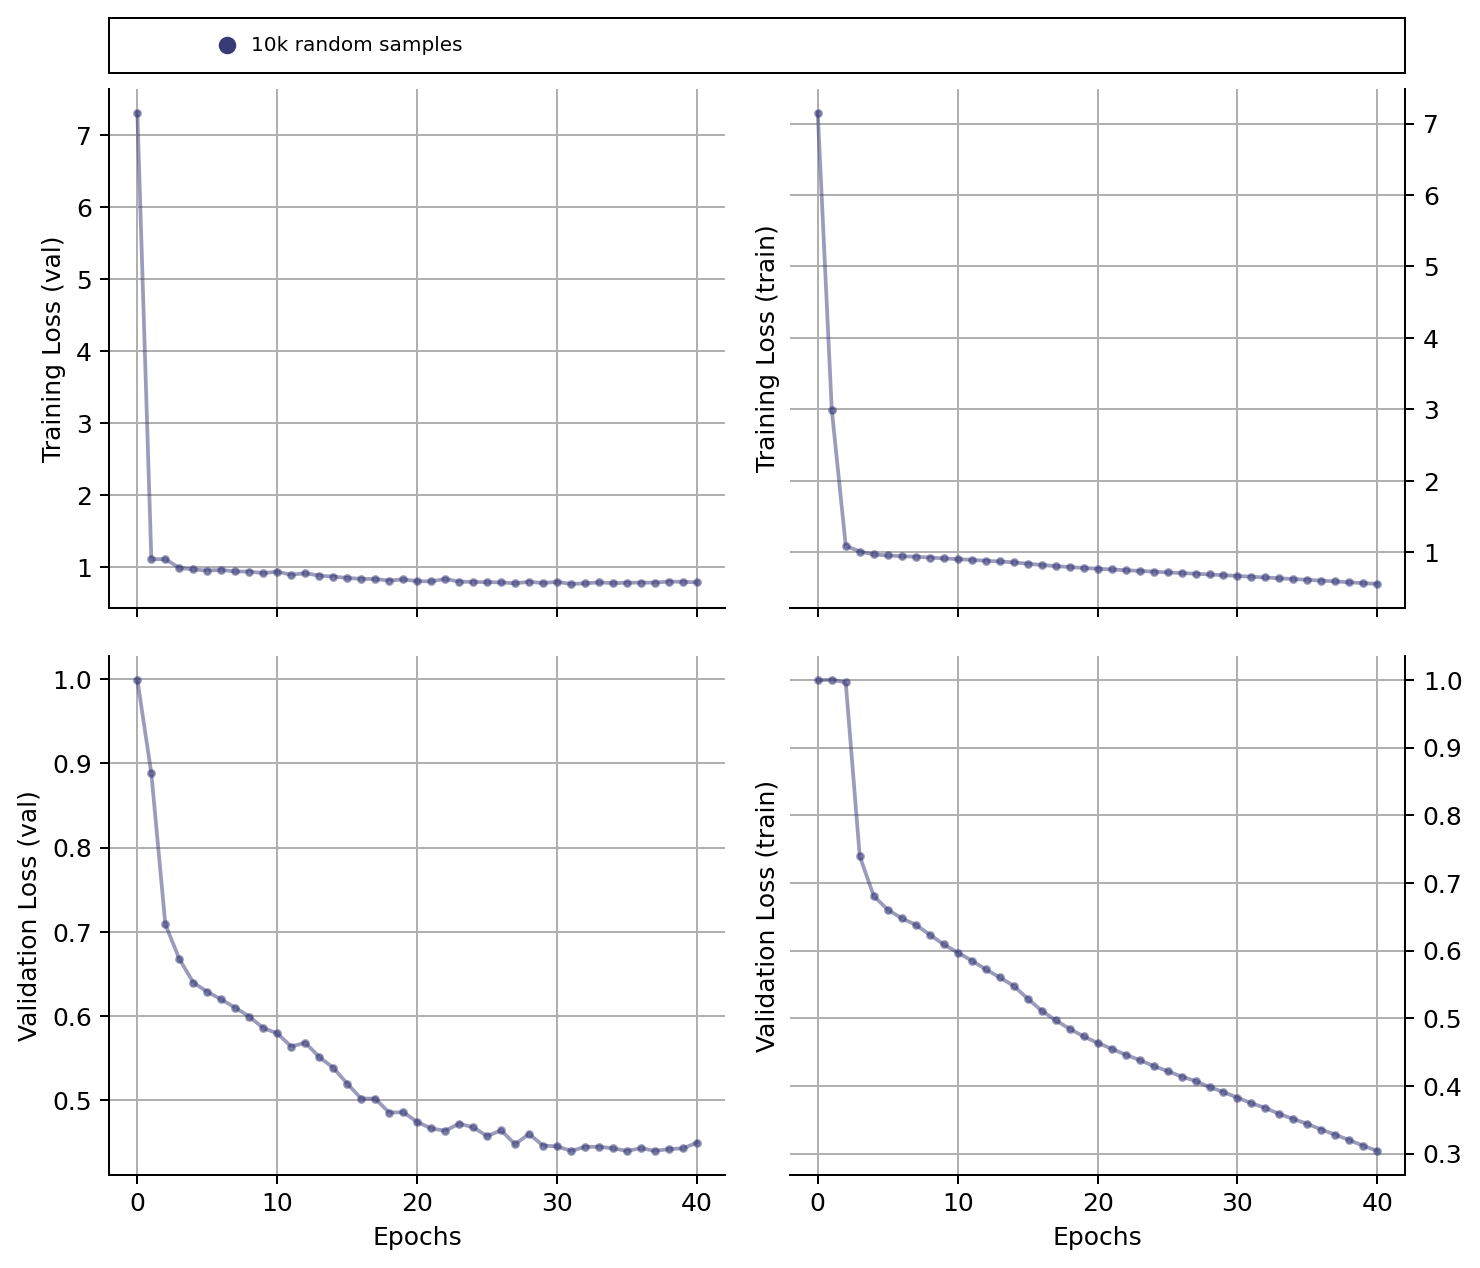

In [11]:
from drg_tools.plotlib import plot_losses
import os
output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
model_stem = 'psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F'
losslog = os.path.join(output_path, model_stem) + '_loss.txt'

# Plot the losses
plot_losses(losslog, '10k random samples', percentages=False, combine_sets=False, logx=False, adjust_axis=False, savefig=None)


## Look at the performance of the trained model

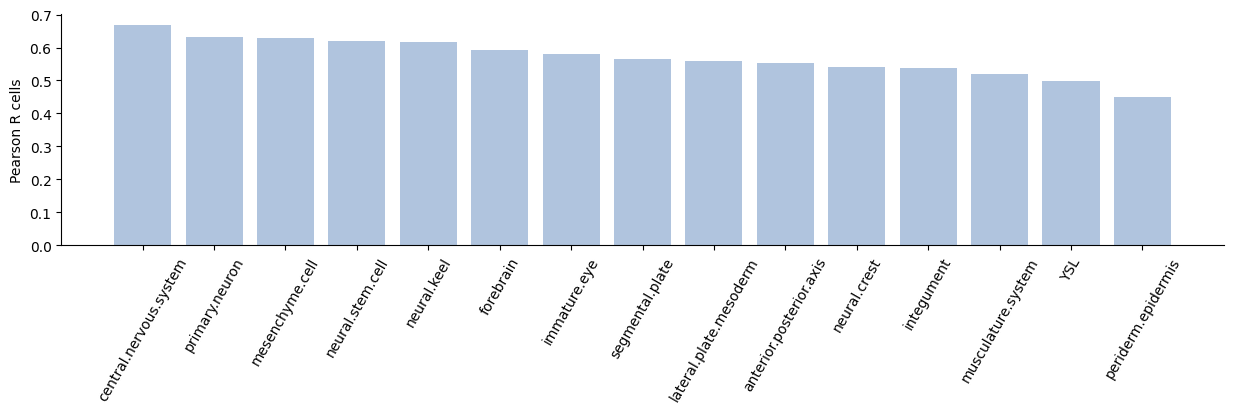

In [14]:
from drg_tools.plotlib import _bar_plot
import os
import numpy as np
import matplotlib.pyplot as plt
# Load the correlation data
output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
model_stem = 'psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F'
trackcorr = os.path.join(output_path, model_stem) + '_clss_corr_tcl0.txt'
corrvalues = np.genfromtxt(trackcorr, dtype = str)
sort = np.argsort(corrvalues[:,1].astype(float))
#print(corrvalues)
ax = _bar_plot(1.-corrvalues[sort,1].astype(float), ylabel = 'Pearson R cells', horizontal = False, xticklabels = corrvalues[sort,0], rotation = 60)
plt.show()


yaxis 1490.0


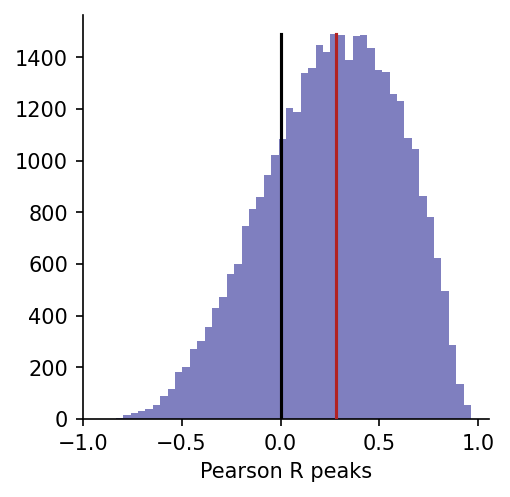

In [15]:
from drg_tools.plotlib import plotHist
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the correlation data
output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
model_stem = 'psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F'

peakcorr = os.path.join(output_path, model_stem) + '_pnt_corr_tcl0.txt'
corrvalues = np.genfromtxt(peakcorr, dtype = str)
ax = plotHist(1.-corrvalues[:,1].astype(float), add_median = True, add_yaxis= True, xlabel = 'Pearson R peaks', bins = 50)
plt.show()

## Load model and look at attributions for neural creast cells

In [1]:
from drg_tools.model_utils import get_device, process_cnn_arguments, load_parameters
from drg_tools.cnn_model import cnn 
from drg_tools.io_utils import readin
from drg_tools.model_training import create_sets, batched_predict
import os

data_stem = 'psd.bulk.zfish_atac.10hpf.lg1x'
data_dir = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/')
data_file = os.path.join(data_dir, data_stem) +'.qn.csv'

output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
model_stem = 'psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F'

# model training saved two files, one with the weights and biases (pth), and one with the arguments that defined the model architecture
model_args = os.path.join(output_path, model_stem) +  '_model_params.dat'
model_pth = os.path.join(output_path, model_stem) + '_parameter.pth'

# Load the model arguments
init_args = process_cnn_arguments(model_args, replace_arguments=None)
init_args['generate_paramfile'] = False
device = 'cuda:0' #get_device()
#print(device)
#for ia in init_args:
#    print(ia, init_args[ia]) 

# Create the model
model = cnn(**init_args)

# Load the model parameters
load_parameters(model, model_pth, translate_dict = None, allow_reduction = False, exclude = [], include = False)
# Set the model to evaluation mode
model.eval()
# Set model to device
model.to(device)    

# Load the one-hot encoded sequences and measured data and align data points
oh_file = os.path.join(data_dir, data_stem) + '.oh.npz'
X, Y, inputnames, inputfeatures, header = readin(oh_file, data_file, delimiter=',', return_header=True, assign_region=True, n_features=4, combinex=True)

# Check the shape of the data
print(X.shape)
print(Y.shape)
print(inputnames.shape)
print(header)

# Split the data into training and test sets as before
crossval_file=os.path.join(data_dir, data_stem)+'_tset10.txt' # Can either be number of folds, or a file with # Set N \n, followed by a line with all data point names that are in this set separated by a space. 
trainset, testset, valset = create_sets(len(X), crossval_file, 0, Yclass = None, genenames = inputnames)
print('Train', len(trainset))
print('Test', len(testset))
print('Val', len(valset))

# Make predictions with the model using 
test_predictions = batched_predict(model, X[testset], batchsize=128, device=device, shift_sequence=model.shift_sequence, random_shift=model.random_shift)

# Plot predictions versus measured data in a scatter plot
import matplotlib.pyplot as plt
import numpy as np
from drg_tools.plotlib import scatterPlot, plot_scatter
nc_index = np.where(np.array(header) == 'neural.crest')[0][0]
''' 
singlefig = scatterPlot(Y[testset,nc_index], test_predictions[:, nc_index], title = 'neural.crest', xlabel = 'Measured', ylabel = 'Predicted', 
            include_fit = True, include_mainvar = False, diagonal = True, plot_axis = False, 
            boxplot_x = None, boxplot_y = None, contour = True, pos_neg_contour = False, 
            color=None, edgecolor = 'silver', cmap = None, sort_color = 'abshigh', 
            color_density = True, vlim = None, sizes = 2, alpha = None, 
            lw = 0., yticklabels = None, yticks = None, xticklabels = None, 
            xticks = None, grid = False, xlim = None, ylim =None, xscale = None, legend = False, 
            add_text = None, yscale = None, ax = None, dpi = 200)

allfig = plot_scatter(list(Y[testset].T), list(test_predictions.T), titles = header, xlabel = 'Measured', ylabel = 'Predicted', 
                      sizes = 2, contour = True, color_density = True, color = 'grey', lw = 0., legend = True)
plt.show()
'''



ALL file names CNNmodel_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F
In features 4 510
Convolutions 300 510
Pooling 300 255
2nd convolutions 300 255
Convolution after attention 300 8
Before FCL 2400
outclasses 15
Loaded convolutions.conv1d.weight with convolutions.conv1d.weight
Loaded convolution_layers.convlayers.Conv0.conv1d.weight with convolution_layers.convlayers.Conv0.conv1d.weight
Loaded trconvolution_layers.convlayers.Conv0.conv1d.weight with trconvolution_layers.convlayers.Conv0.conv1d.weight
Loaded trconvolution_layers.convlayers.Conv0.conv1d.bias with trconvolution_layers.convlayers.Conv0.conv1d.bias
Loaded trconvolution_layers.convlayers.Conv1.conv1d.weight with trconvolution_layers.convlayers.Conv1.conv1d.weight
Loaded trconvolution_layers.convlayers.Conv1.conv1d.bias with trconvolution_layers.convlayers.Conv1.conv1d.bias
Loaded trconvolution_layers.convlayers.Conv2.conv1d.weight with trconvolution_layers.convlayers.Con

" \nsinglefig = scatterPlot(Y[testset,nc_index], test_predictions[:, nc_index], title = 'neural.crest', xlabel = 'Measured', ylabel = 'Predicted', \n            include_fit = True, include_mainvar = False, diagonal = True, plot_axis = False, \n            boxplot_x = None, boxplot_y = None, contour = True, pos_neg_contour = False, \n            color=None, edgecolor = 'silver', cmap = None, sort_color = 'abshigh', \n            color_density = True, vlim = None, sizes = 2, alpha = None, \n            lw = 0., yticklabels = None, yticks = None, xticklabels = None, \n            xticks = None, grid = False, xlim = None, ylim =None, xscale = None, legend = False, \n            add_text = None, yscale = None, ax = None, dpi = 200)\n\nallfig = plot_scatter(list(Y[testset].T), list(test_predictions.T), titles = header, xlabel = 'Measured', ylabel = 'Predicted', \n                      sizes = 2, contour = True, color_density = True, color = 'grey', lw = 0., legend = True)\nplt.show()\n"

## Selected trusted well-predicted data points

Selected 12 sequences for neural crest


/home/sasse/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TISM time for (12, 1, 4, 500) 1 0.14403271675109863
IntegratedGradients (12, 1, 4, 500) 0.2677001953125
TISM time for (12, 1, 5, 50) 1 0.06988024711608887
Condensed grad attributions of shape (12, 1, 5, 50)


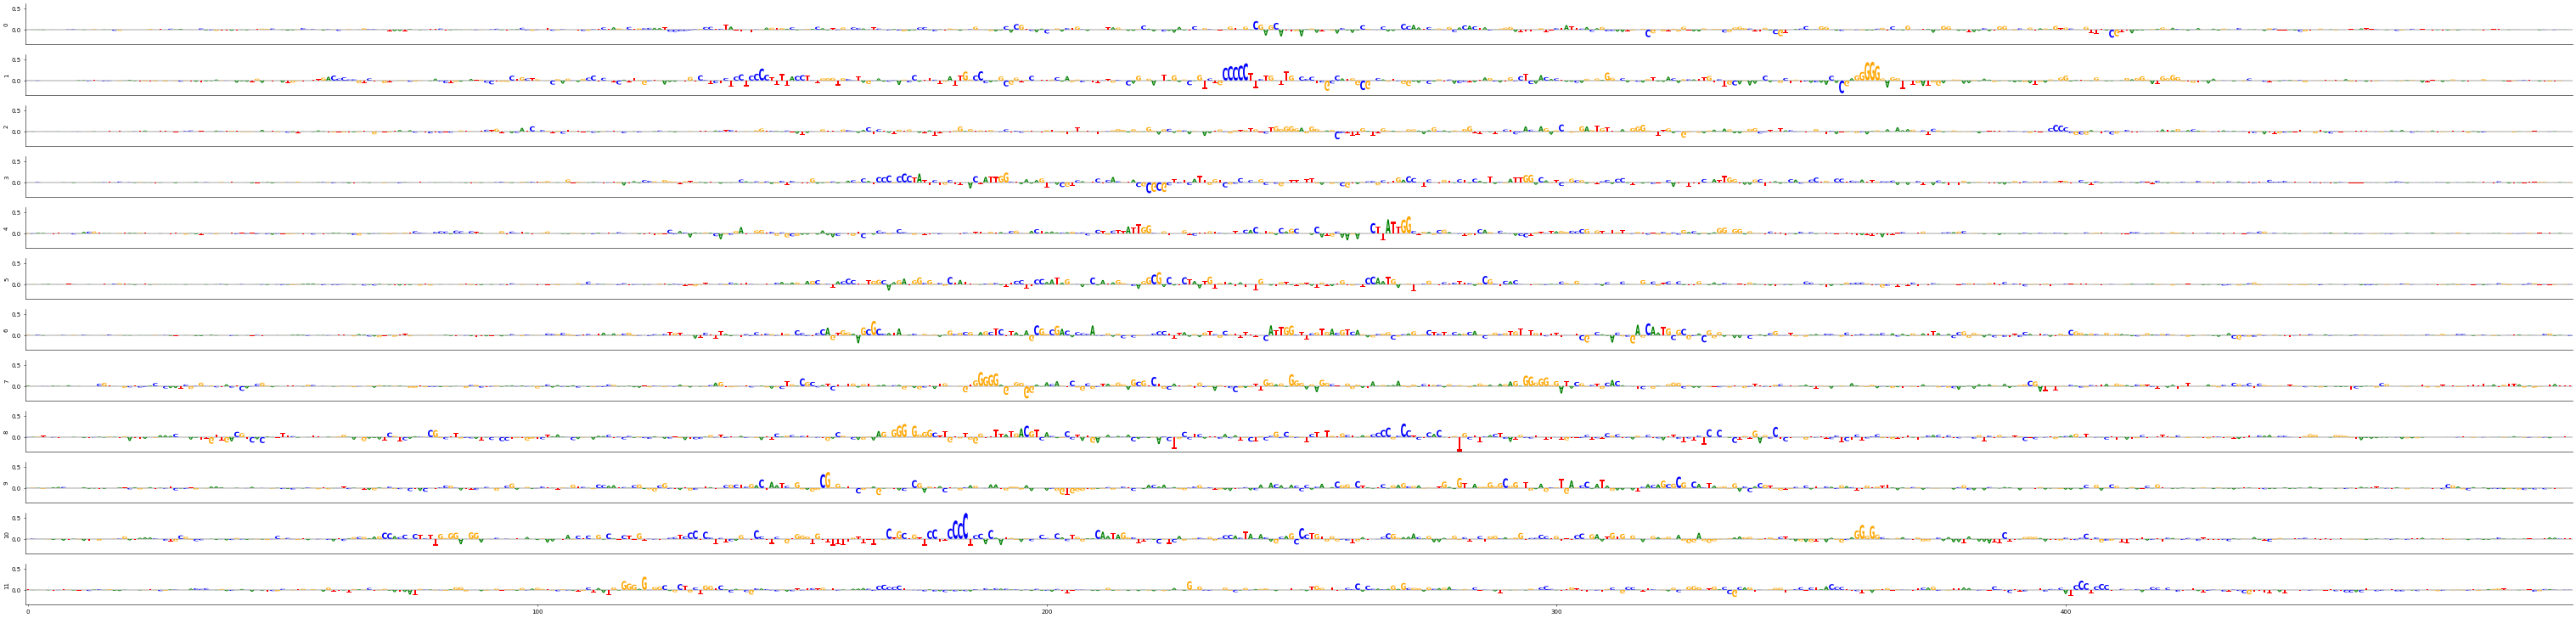

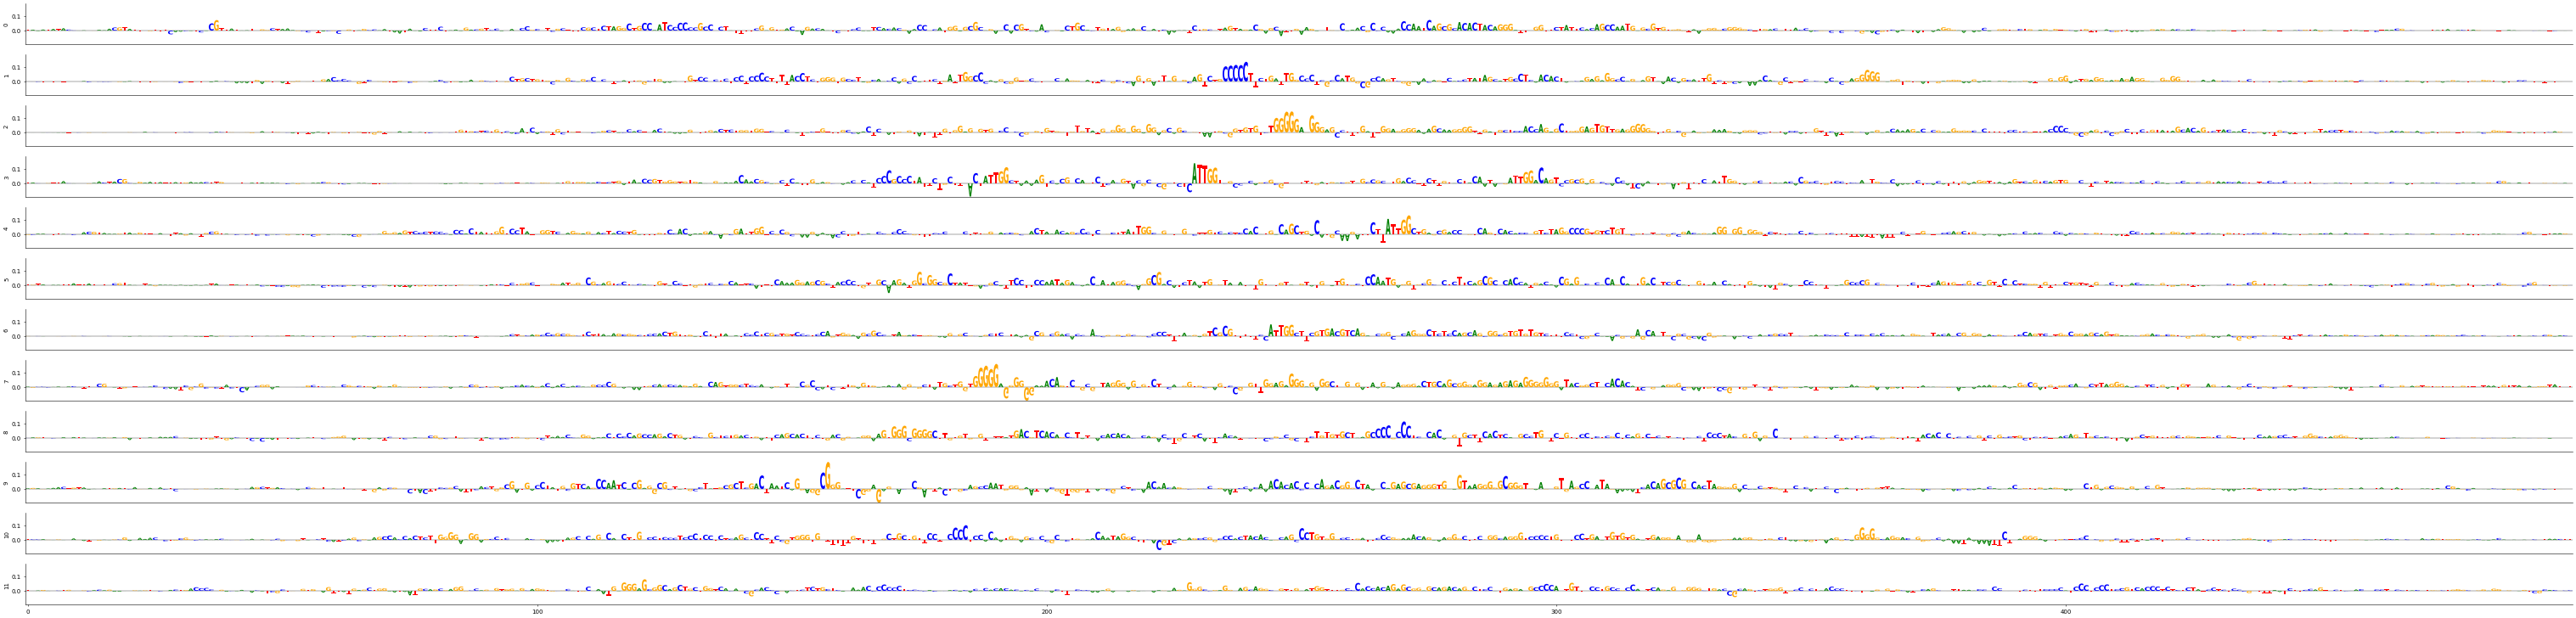

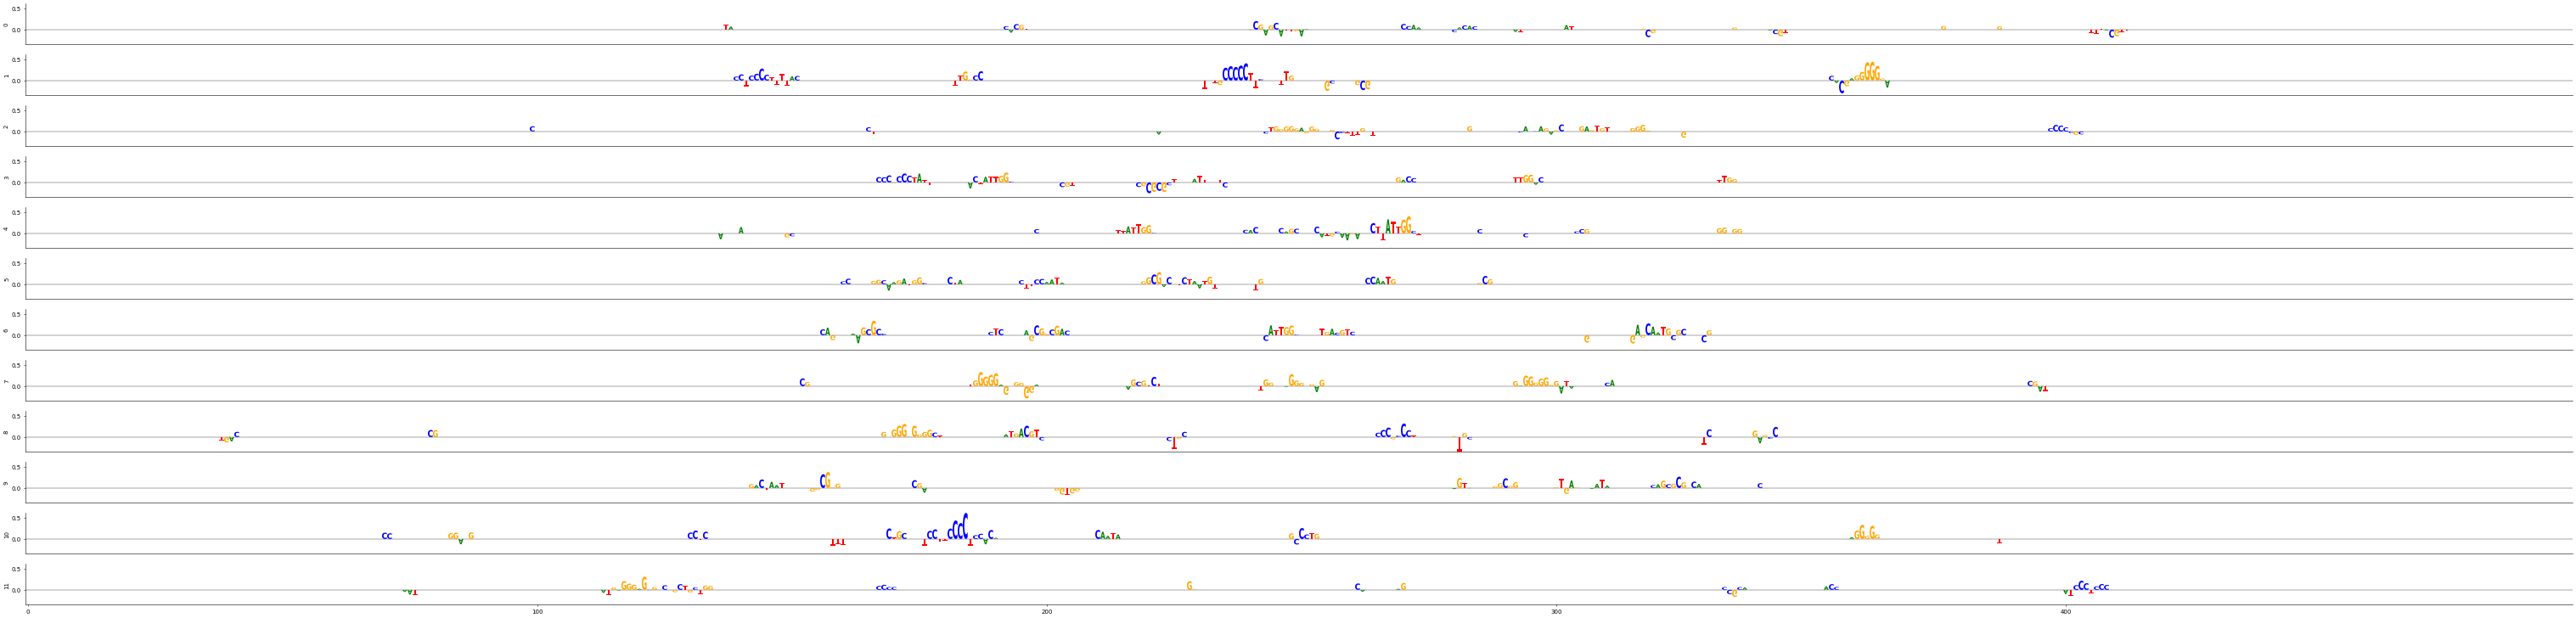

In [2]:
# Select set of sequences for neural.crest
import numpy as np
nc_index = list(header).index('neural.crest')

# Select sequence with highest signal and close to measured
testmask = (np.abs(Y[testset,nc_index]-test_predictions[:, nc_index])<1.) & (test_predictions[:, nc_index] > 6.)
print(f'Selected {int(np.sum(testmask))} sequences for neural crest')
# indices of sequences
selcted_indices = testset[testmask]

# Get the selected sequences
selected_sequences = X[selcted_indices]
# Get the selected names
selected_names = inputnames[selcted_indices]

from drg_tools.interpret_cnn import takegrad, ism, deeplift, captum_sequence_attributions

# Confirm predictions
#model.eval()
#print(model.predict(selected_sequences))

gradattr = takegrad(selected_sequences, model, tracks = nc_index, device=device, output='attributions')
#deepliftattr = deeplift(selected_sequences, model, tracks = nc_index, device=device, output='attributions')
#ismattr = ism(selected_sequences, model, tracks = nc_index, device=device, output='attributions') 
igattr = captum_sequence_attributions(selected_sequences, model, tracks = nc_index, attribution_method = 'IntegratedGradients', 
                                      basefreq = 0.25, batchsize = None, output = 'attributions')
# plot the attributions
import matplotlib.pyplot as plt
from drg_tools.plotlib import plot_attribution_maps, correct_sparse_attributions
# Change the dimension of attributions
gradattr = np.transpose(gradattr[:,0], axes = (0,2,1)) 
figgrad = plot_attribution_maps(gradattr, seq = np.transpose(selected_sequences, axes = (0,2,1)), motifs = None, experiments = None, 
                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
                          xtick_range = None, barplot = None, heatmap = False)

#figgradall = plot_attribution_maps(gradattr, seq = None, motifs = None, experiments = None, 
#                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
#                          xtick_range = None, barplot = None, heatmap = False)

# DEEPLIFT DOES NOT WORK FOR ALL MODEL ARCHITECTURES; ALWAYS CHECK WITH ISM
#deepliftattr = np.transpose(deepliftattr[:,0], axes = (0,2,1)) 
#figdl = plot_attribution_maps(deepliftattr, seq = np.transpose(selected_sequences, axes = (0,2,1)), motifs = None, experiments = None, 
#                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
#                          xtick_range = None, barplot = None, heatmap = False)

#ismattr = np.transpose(ismattr[:,0], axes = (0,2,1)) 
#figism = plot_attribution_maps(ismattr, seq = np.transpose(selected_sequences, axes = (0,2,1)), motifs = None, experiments = None, 
#                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
#                          xtick_range = None, barplot = None, heatmap = False)

iggattr = np.transpose(igattr[:,0], axes = (0,2,1)) 
figigg = plot_attribution_maps(iggattr, seq = np.transpose(selected_sequences, axes = (0,2,1)), motifs = None, experiments = None, 
                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
                          xtick_range = None, barplot = None, heatmap = False)

# To save memory or disc space, we can also tell the algorithms to return only the highest 100 positions
gradattrtop = takegrad(selected_sequences, model, tracks = nc_index, device=device, output='attributions', top = 50)
print(f'Condensed grad attributions of shape {gradattrtop.shape}')
# Before plotting, we need to undense this attribution format, and use zeros where nothing was saved.
gradattrtopvis = correct_sparse_attributions(np.transpose(gradattrtop[:,0], axes = (0,2,1)), n_channels = 4, l_seq = 500)
figgradtop = plot_attribution_maps(gradattrtopvis, seq = np.transpose(selected_sequences, axes = (0,2,1)), motifs = None, experiments = None, 
                          vlim = None, unit = 0.15, ratio = 10, ylabel = None,
                          xtick_range = None, barplot = None, heatmap = False)


plt.show()

## Systematically extract motifs from the computed sequence attributions


Selected 433 sequences that differ at most 1 in cell types where they have signal over 5
TISM time for (433, 15, 4, 500) 15 14.664703607559204
Estimated cutoff for significance from standard deviation 0.12194460667669772


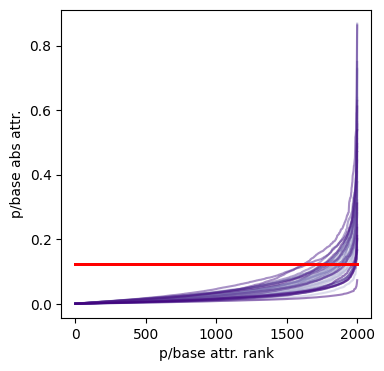

(433, 15, 4, 500) (433, 4, 500)
(433, 15, 500)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15,) + inhomogeneous part.

In [ ]:
# TODO make the find function work with sparse attributions

from drg_tools.motif_analysis import find_motifs
from drg_tools.io_utils import write_meme_file
from drg_tools.plotlib import plotHist
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl

# Select sequence with highest signal and close to measured
testmask = np.sum((np.abs(Y[testset]-test_predictions)<1.) * (test_predictions > 5.), axis = 1) >1
print(f'Selected {int(np.sum(testmask))} sequences that differ at most 1 in cell types where they have signal over 5')
# indices of sequences
selcted_indices = testset[testmask]

# Get the selected sequences
selected_sequences = X[selcted_indices]
# Get the selected names
selected_names = inputnames[selcted_indices]

# Compute gradients for all tracks
gradattr = takegrad(selected_sequences, model, tracks = None, device='cuda:0', output='attributions')

sigcut = 1.95 * np.mean(np.std(gradattr, axis = (-1,-2)))
print(f'Estimated cutoff for significance from standard deviation {sigcut}')
# Plot distribution of absolute attribution effect against their rank
# To determine best estimate for significance cut off 
nd = 50
rt = 8
colors = pl.cm.Purples(np.linspace(0,1,nd))
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
for i in range(nd):
    absgrad = np.abs(gradattr[i,rt].flatten())
    absgrad = np.sort(absgrad)
    rank = np.argsort(np.argsort(absgrad))
    ax.plot(rank, absgrad, alpha = 0.5, c = colors[i])
    ax.plot(rank, np.ones(len(rank))*sigcut, c = 'r')
ax.set_xlabel('p/base attr. rank')
ax.set_ylabel('p/base abs attr.')
plt.show()

# Use this cutoff to extract motifs from attributions for all tracks
# also record the mean and max effect, and scale attributions to abs max of 1 to cluster smaller motifs with larger ones
maxgap = 1 # Define max allowed gap
minsig = 4 # Define minumum number of significant bases
# Motifs are detected on the attributions of the reference base
print(gradattr.shape, selected_sequences.shape)
stats = np.sum(gradattr * selected_sequences[:, None], axis = -2)
print(stats.shape)
# From experience, we have seen that sometimes xAI methods can smear the attributions
# We don't want to include long motifs with no significance, so we also restrict ourselves 
# to motifs shorter than 30bp
max_motlen = 30
normed_motifs = []
motif_mean_effect = []
motif_max_effect = []
motif_borders = []
N_motifs = []
for c, ct in enumerate(header):
    norm_mot, mot_mean, mot_max, mot_bor, n_mot = [], [], [], [], []
    for i in range(gradattr.shape[0]):
        motiflocs = find_motifs(stats[i, c], sigcut, maxgap, minsig) # Returns a list of lists with positions of the motifs
        n_mot.append(len(motiflocs))
        for ml in motiflocs: 
            if ml[-1]-ml[0] < max_motlen:
                mot_bor.append([ml[0], ml[-1]+1])
                # Negative or positive max
                mot_max.append(stats[i, c][ml[0]: ml[-1]+1][np.argmax(np.abs(stats[i, c][ml[0]: ml[-1]+1]))])
                mot_mean.append(np.mean(stats[i, c][ml[0]: ml[-1]+1]))
                norm_mot.append(gradattr[i, c][:, ml[0]: ml[-1]+1]/mot_max[-1]) # To max normalized and sign adjusted motif
            
    normed_motifs.append(norm_mot)
    motif_mean_effect.append(np.array(mot_mean))
    motif_max_effect.append(np.array(mot_max))
    motif_borders.append(np.array(mot_bor,dtype = int))
    N_motifs.append(n_mot)

output_path = os.path.expanduser('~/CZS/Projects/ZebraFishDevelopment/Models/')
model_stem = 'psd.bulk.zfish_atac.10hpf.lg1x.qnonoh-cv0-0_MSEk300l19FfGELUmax2vlCosssft51_dc1i1d1s1l7r1_tc5dNoned1s1r6l7ma2nfc2s512fdo0.1tr4e-06SGD0.9bs64-F'
# Save the seqlets
seqlet_file = os.path.join(output_path, model_stem) + '_seqlets.npz'
np.savez_compressed(seqlet_file, names = selected_names, cells = header, seqlets = np.array(normed_motifs, dtype = object), 
                    mean_effect = np.array(motif_mean_effect, dtype = object), max_effect = np.array(motif_max_effect, dtype = object), 
                    borders = np.array(motif_borders, dtype = object))

# For every cell type, plot the distribution of the number of motifs
fig, axes = plt.subplots(5, 3, figsize = (3 *3, 5*3))
for h, head in enumerate(header):
    ax = axes[h//3,h%3]
    ax.hist(N_motifs[h], bins = np.arange(15))
    ax.set_title(head)
    ax.set_ylim([0,120])
plt.tight_layout()
fig.text(0.5, 0.04, 'Number motifs', ha='center')
plt.show()




## Cluster motifs and combine

In [ ]:
# TODO Make partial clustering functions part of the drg_tools

## Normalize motifs, find TFs with TomTom, assign names

In [ ]:
# TODO, use tangermeme tomtom, and also simple correlation function

## Plot motifs in tree with detected number of occurrances, and mean, and max effect

In [ ]:
# TODO function to summarize the effects for boxplots

## Summarize all effects across all cell types to matrix and plot with tree